## Set Wd and install packages

In [1]:
#Set working directory
setwd("~/U_of_H/FALL_2021/Data_ARMS")

#load necessary packages
library("dplyr")
library("ggplot2")
library("data.table")
library ("magrittr")
library("plyr")
library("reshape2")
library("tidyr")
library("RColorBrewer")
library("colorRamps")
library("vegan")
library("indicspecies")
library("stats")


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'plyr' was built under R version 3.6.3"------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package

## upload 3 files:  taxonomy table, ASV table and meta data 

### code

In [2]:
taxonomy_DNA <- as.data.frame (fread("Assignation_Taxonomique_MBIO612_ARMS_COI_GM.csv"))
ASV_table_DNA <- as.data.frame (fread ("ASV_Table_Abondance_nochim_MBIO612_ARMS_GM.csv", header = TRUE))
metadata_df_DNA <- as.data.frame (fread ("GabyMetaData_ARMS_COI_2021.csv"))

#set row.names properly for taxonomy and ASV and metadata files
rownames(ASV_table_DNA) <- ASV_table_DNA$ID_ASV
rownames(taxonomy_DNA) <- taxonomy_DNA$ID_ASV
rownames(metadata_df_DNA) <- metadata_df_DNA$Sample


#delete useless sample for meta data table
metadata_df_DNA$SeqRunCheck <- NULL

### Function

In [3]:

read.3.files <- function (taxonomy.file, Abundance.ASV.table, meta.data.file) { 
 taxonomy_DNA <- as.data.frame(fread(taxonomy.file))
 ASV_table_DNA <- as.data.frame(fread (Abundance.ASV.table, header = TRUE))
 metadata_df_DNA <- as.data.frame(fread (meta.data.file))
 
    #set row.names properly for taxonomy and ASV and metadata files
    rownames(ASV_table_DNA) <- ASV_table_DNA$ID_ASV
    rownames(taxonomy_DNA) <- taxonomy_DNA$ID_ASV
    rownames(metadata_df_DNA) <- metadata_df_DNA$Sample  
    
    assign("taxonomy_DNA", taxonomy_DNA, envir = .GlobalEnv)
    assign("ASV_table_DNA", ASV_table_DNA, envir = .GlobalEnv)
    assign("metadata_df_DNA", metadata_df_DNA, envir = .GlobalEnv)
    
}  
    

## Merge full tables

### function

In [4]:

merge.full.table <- function (taxonomy_DNA, ASV_table_DNA) {
    
    #Merge Taxonomy and ASV tables into a new object
    combined_table <- join(taxonomy_DNA, ASV_table_DNA)
    rownames(combined_table) <- rownames(ASV_table_DNA)


    #delete useless ID_ASV column for taxonxomy and ASV tables
    ASV_table_DNA$ID_ASV <- NULL
    taxonomy_DNA$ID_ASV <- NULL
    combined_table$ID_ASV <- NULL
    
     assign("combined_table", combined_table, envir = .GlobalEnv)
    
    }

### code

In [5]:
#merge full table

#Merge Taxonomy and ASV tables into a new object
combined_table <- join(taxonomy_DNA, ASV_table_DNA)
rownames(combined_table) <- rownames(ASV_table_DNA)


#delete useless ID_ASV column for taxonxomy and ASV tables
ASV_table_DNA$ID_ASV <- NULL
taxonomy_DNA$ID_ASV <- NULL
combined_table$ID_ASV <- NULL


Joining by: ID_ASV


## Get tables

### functions

In [251]:
#Remove the ASVs that haven't been classified up to the desired taxonomic level (ex: exclude ASV that haven't been anotated to the phylum level)

combine_tax_abundance <- function (combined_full_df, taxa_col) {
    
    combined_df_working <- combined_full_df %>%  filter({{taxa_col}} != "")
    
    assign ("combined_df_working ", combined_df_working , envir = .GlobalEnv)
    
      }

#test

combine_tax_abundance(combined_table, phylum)


In [7]:
#flip the taxonomic/abundance

flip_df <- function (df) {
    
    flipped_table <- data.frame (t(df))
    
     assign ("flipped_table", flipped_table, envir = .GlobalEnv)
    
     }

In [41]:
flip_df(combined_Table_Phylum)

In [62]:
#Merge meta data

merge_df <- function (flipped_df, meta_data,  by_row_col) {
    
    
     combined_full_df <- flip_df(flipped_df)
    
     combined_Table_Meta_data <- merge (combined_full_df, meta_data, by= substitute(by_row_col), all.y = T)
    
    # assign ("combined_Table_Meta_data", combined_Table_Meta_data, envir = .GlobalEnv)
    
     }


In [64]:
merge_df(combined_Table_Phylum, metadata_df_DNA, "row.names")

In [ ]:
#Subset ASV working ASV df form working df

In [837]:
subset_df_nested <- function (full_df, subset_df) {
    
    combined_working_Meta_data <- full_df [,full_df %in% subset_df]
    combined_working_Meta_data$Row.names <- row.names(subset_df)
    
    assign("combined_working_Meta_data", combined_working_Meta_data, envir = .GlobalEnv)
    
     }


In [749]:
subset_df_nested (combined_Table_Meta_data, metadata_df_DNA)

In [750]:
subset_numeric_df <- function (full_df) {
    
    ASV_table_DNA_working <- full_df [sapply(full_df, is.numeric)]
    assign("ASV_table_DNA_working", ASV_table_DNA_working, envir = .GlobalEnv)
    
     }

In [753]:
subset_numeric_df (combined_Table_Working)

In [754]:
subset_join <- function (full_df, subset_df) {
    
    taxonomy_DNA_working <- semi_join(subset_df, full_df)
    assign("taxonomy_DNA_working", taxonomy_DNA_working, envir = .GlobalEnv)
    
     }

In [757]:
subset_join (combined_Table_Working, taxonomy_DNA)

Joining, by = c("kingdom", "phylum", "class", "order", "family", "genus", "species")


In [762]:
 #long version of the table

elongate_df <- function (full_df, names_df) {
    
    combined_Table_Meta_data_melt <- melt(full_df, id= names (names_df))

    assign("combined_Table_Meta_data_melt", combined_Table_Meta_data_melt, envir = .GlobalEnv)
    
     }

In [761]:
elongate_df(combined_Table_Meta_data, combined_working_Meta_data)

Warning message:
"attributes are not identical across measure variables; they will be dropped"

In [825]:
 #merge ASV_table working with meta data: no taxonomy

flipped_df_subset <- function (full_df, meta_data_df) {
    
    t_ASV_table_DNA_working <- flip_df (full_df)
    
    metadata_df <- meta_data_df %>%
    mutate_all(as.character)
    
    row.names(metadata_df)<- metadata_df$Sample

    ASV_Meta_data_working <- na.omit(merge(t_ASV_table_DNA_working, metadata_df, by="row.names",all.y=T))

    rownames(ASV_Meta_data_working) <- ASV_Meta_data_working[,1]

    ASV_Meta_data_working$Row.names <- NULL
    
    assign("ASV_Meta_data_working", ASV_Meta_data_working, envir = .GlobalEnv)


     }

In [828]:
flipped_df_subset(ASV_table_DNA_working, metadata_df_DNA)

In [830]:
 #Subset so no more meta data: flipped table with only taxonomy and abundance

subset_no_character_df <- function (full_df) {
    
    t_ASV_table_DNA_working_1 <- full_df [!(sapply(full_df, is.character))]
    
    assign("t_ASV_table_DNA_working_1", t_ASV_table_DNA_working_1, envir = .GlobalEnv)
    
    
     }

In [833]:
#flipped meta data
   
subset_character_df <- function (full_df) {
    
    Meta_data_working <- full_df [(sapply(full_df, is.character))]
    
    assign("Meta_data_working", Meta_data_working, envir = .GlobalEnv)
    
     }

In [836]:
subset_character_df(ASV_Meta_data_working)

### Code

In [9]:
#phylum tables: working tables


#Remove the ASVs that haven't been classified up to the phylum level
combined_Table_Phylum <- combined_table %>%
  filter (phylum != "")

#flip the taxonomic/abundance
combined_Table_Meta_data<-data.frame(t(combined_Table_Phylum))

#Merge with metadata table
combined_Table_Meta_data<-merge(combined_Table_Meta_data,metadata_df_DNA, by="row.names",all.y=T)

#flipped metadata table
flipped_combined_Table_Meta_data<-data.frame(t(combined_Table_Meta_data))

#obtain phyla only meta data
combined_Phyla_Meta_data <- combined_Table_Meta_data [,combined_Table_Meta_data %in% metadata_df_DNA]
combined_Phyla_Meta_data$Row.names <- row.names(metadata_df_DNA)


#ASV table phylum only
ASV_table_DNA_phylum<-combined_Table_Phylum[sapply(combined_Table_Phylum, is.numeric)]

#Taxonomy table phyla only
taxonomy_DNA_phylum <-semi_join(taxonomy_DNA, combined_Table_Phylum)

#long version of the table
combined_Table_Meta_data_melt <- melt(combined_Table_Meta_data, id= names (combined_Phyla_Meta_data))


#merge ASV_table phylum with meta data: no taxonomy
t_ASV_table_DNA_phylum <- t(ASV_table_DNA_phylum)

metadata_df_DNA<- metadata_df_DNA%>%
  mutate_all(as.character)

row.names(metadata_df_DNA)<- metadata_df_DNA$Sample

ASV_Meta_data_Phylum<-na.omit(merge(t_ASV_table_DNA_phylum,metadata_df_DNA, by="row.names",all.y=T))

rownames(ASV_Meta_data_Phylum) <- ASV_Meta_data_Phylum[,1]

ASV_Meta_data_Phylum$Row.names<- NULL

Joining, by = c("kingdom", "phylum", "class", "order", "family", "genus", "species")
Warning message:
"attributes are not identical across measure variables; they will be dropped"

In [550]:
#Subset so no more meta data: flipped ASV phylum table
t_ASV_table_DNA_phylum_1<- ASV_Meta_data_Phylum [!(sapply(ASV_Meta_data_Phylum, is.character))]

#subset so only meta data
Meta_data_phylum <- ASV_Meta_data_Phylum [(sapply(ASV_Meta_data_Phylum, is.character))]

## Barplot for taxonomic diversity

### functions

In [185]:
#Function : select the 20 most abundant taxa (ex:families) and combute the abundance of ASV for each of them

#select the taxa column
 extract_taxa_col <- function (working_taxonomy_table, taxa) {
    
   taxonomy_taxa <- working_taxonomy_table %>% 
    select ((.data[[taxa]]))
    
    taxonomy_taxa["variable"] <- row.names(taxonomy_taxa)
     
    assign("taxonomy_taxa", taxonomy_taxa, envir = .GlobalEnv)
     
      }


In [191]:
extract_taxa_col(taxonomy_DNA_phylum, "family")

In [216]:
#Add the taxa col to the elongated table

add_extracted_taxa_long_df <- function (long_df, working_taxonomy_table, taxa, by_variable) {
    
   taxa_col <- extract_taxa_col(working_taxonomy_table, taxa)
    
  
    Extracted_taxa_long_df <- merge (long_df, taxa_col, by= substitute(by_variable))
    
    
    Extracted_taxa_long_df <- data.frame (Extracted_taxa_long_df, stringsAsFactors = TRUE)

   
    Extracted_taxa_long_df [,by_variable] <- factor(Extracted_taxa_long_df[,by_variable])

   
    assign("Extracted_taxa_long_df", Extracted_taxa_long_df, envir = .GlobalEnv)
    
     }


In [217]:
add_extracted_taxa_long_df (combined_Table_Meta_data_melt, taxonomy_DNA_phylum, "family", "variable")

In [366]:
#Select only the data that is anotated to the given taxa level

select_taxa_only <- function (combined_full_df, taxa) {
    
   # l <- add_extracted_taxa_long_df (long_df, working_taxonomy_table, taxa, by_variable)
   # add_extracted_taxa_long_df (long_df, working_taxonomy_table, taxa, by_variable)
    
     Taxa_ASV_df <- combine_tax_abundance (combined_full_df, {{taxa}})
    
    #Make the value column numeric
    
   Taxa_ASV_df[,"value"] <- as.integer(Taxa_ASV_df[,"value"])

    assign(" Taxa_ASV_df",  Taxa_ASV_df, envir = .GlobalEnv)
    
      }

#test
    
#combine_tax_abundance(combined_table, phylum)

In [367]:
select_taxa_only(Family_combined_Table_Meta_data_melt, family)

In [543]:
##Select the 20 most abundant families and label and combine the other ones as other labelled the "others" together

subset_20_most_abundant_and_others <- function (Taxa_only_df, taxa_name) {

Taxa_ASV_abundant <- Taxa_only_df %>%
  group_by({{taxa_name}}) %>%
  drop_na() %>%
  dplyr::summarize (sum_asv= sum(value)) %>%
  arrange(desc(sum_asv)) %>%
  mutate (sum_asv_cumul =  if_else (row_number (sum_asv)< (length(sum_asv)-19), "Other", as.character(sum_asv))) %>%
  mutate(sum_asv = replace(sum_asv, sum_asv_cumul == "Other", sum(sum_asv[sum_asv_cumul == "Other"]))) 
  
#Taxa_ASV_abundant[,substitute(taxa_name)] <- as.character(Taxa_ASV_abundant[, substitute(taxa_name)])
    
    
}


In [554]:
#Replace the last 20 families by others

Group_others <- function (Taxa_only_df, taxa_name) {
    
    length_df <- nrow (Taxa_only_df)
    
    Taxa_only_df[21:length_df, taxa_name] <- "Other"
    
}

In [555]:
Group_others(Family_ASV_abundant_1, "family")

In [ ]:
#Add meta data to Table

Add_meta_data <- merge(Family_ASV, Family_ASV_abundant_no_zoroes, by="family")



In [577]:
#Add meta data to families

add_meta_data <- function (Taxa_df, meta_data, taxa_name) {
    
    Family_Table_Meta_data <- merge(Taxa_df, meta_data, by= substitute(taxa_name))
    
    Family_Table_Meta_data [,"sum_asv_cumul"] <- NULL
  
}


In [579]:
add_meta_data(Family_ASV, Family_ASV_abundant_no_zoroes, "family")

In [694]:
#Find the mean number of ASV per taxa per factor 

calculate_mean_ASV_factor <- function (meta_data_ASV_df, taxa_name, factor_col) {
    
 meta_data_ASV_df[,"value"] <- as.numeric(meta_data_ASV_df[,"value"])
    
    
    ASV_per_group_per_taxa <- meta_data_ASV_df %>%
       dplyr::group_by(.data[[factor_col]], .data[[taxa_name]]) %>%
        dplyr::summarize(mean_abundance_ASV_group =  mean(value,na.rm=T))
}
 


In [696]:
calculate_mean_ASV_factor (Family_Table_Meta_data_zeroes, "family", "Island")

`summarise()` has grouped output by 'Island'. You can override using the `.groups` argument.


In [724]:
#calculate mean number of ASV per sample per factor

calculate_mean_ASV_factor <- function (meta_data_ASV_df, ASV_col, factor_col) {
    
    ASV_per_group <- meta_data_ASV_df %>%
       dplyr::group_by(.data[[ASV_col]], .data[[factor_col]]) %>%
        dplyr::summarize(sum_abundance_ASV_factor = sum(value, na.rm = T))
    
    
    
    Mean_ASV_per_sample_for_ea_factor <- ASV_per_group %>%
    dplyr::group_by(.data[[factor_col]]) %>%
    dplyr::summarize (mean_abundance_ASV_factor = mean(sum_abundance_ASV_factor, na.rm= TRUE))

}
 

In [717]:
calculate_mean_ASV_factor(Family_Table_Meta_data_zeroes, "variable", "Island")

`summarise()` has grouped output by 'variable'. You can override using the `.groups` argument.


In [729]:
#merge the two data frames

merge_factor_barplot <- function (mean_ASV_factor_df, factor_taxa_df, factor_name) {
    
    factor_barplot_df <- merge (mean_ASV_factor_df, factor_taxa_df, by= substitute(factor_name))
    
}


In [730]:
merge_factor_barplot (Mean_ASV_per_sample_for_ea_ISland, Family_per_island, "Island")

In [733]:
#Make and extend color palette for graph

make_color_palette <- function (number_palette, number_taxa) {
    
    color_barplot <- brewer.pal(number_palette, "Paired") 
    
    color_barplot <-  colorRampPalette(color_barplot)(number_taxa)
    
}

In [736]:
make_color_palette(12,21)

In [820]:
#plot

plot_taxonomic_barplot <- function (barplot_data_df, color_palette, taxa_name, factor) {
    
taxonomic_barplot <-ggplot(barplot_data_df, aes (fill = reorder(.data[[taxa_name]], mean_abundance_ASV_fam_island), y= mean_abundance_ASV_fam_island, x= .data[[factor]]))+
    
    geom_bar (position="fill",  stat= "identity") + theme_bw() +
    
    scale_fill_manual(values=color_palette)
    
    taxonomic_barplot
    
}


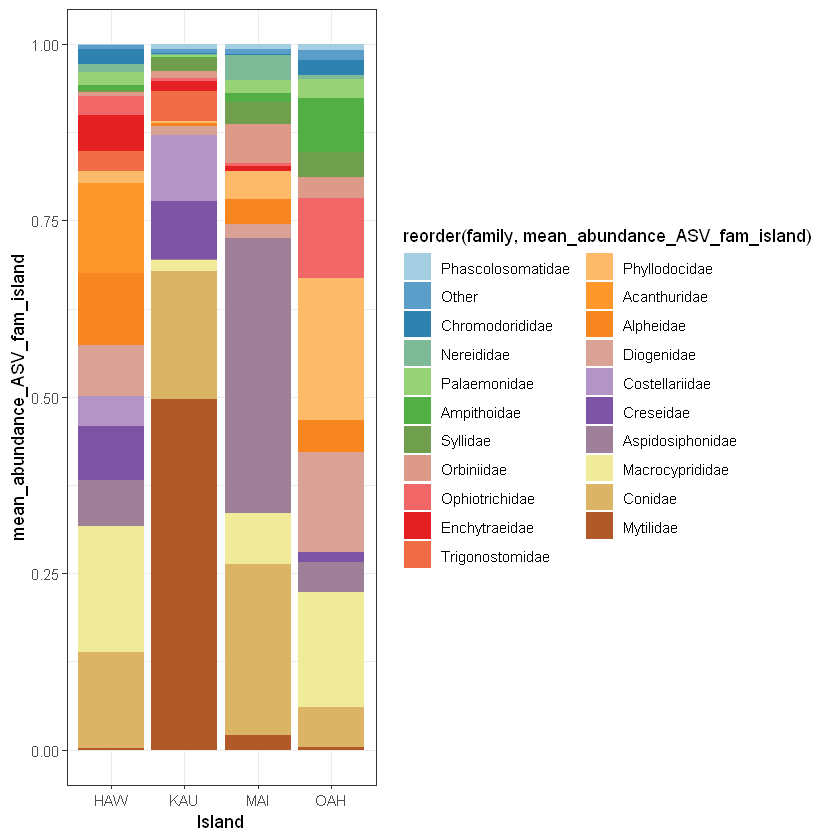

In [821]:
plot_taxonomic_barplot(family_barplot, color_barplot, "family", "Island")

### Code

In [68]:
#select the family column of the taxonomy
taxonomy_family <- taxonomy_DNA_phylum%>% 
  select (family)

taxonomy_family$variable <-row.names(taxonomy_family)

#Add family to the melt table
Family_combined_Table_Meta_data_melt <- merge (combined_Table_Meta_data_melt, taxonomy_family, by="variable", all.y =T)

In [478]:
#Make sure it is a data frame
Family_combined_Table_Meta_data_melt<- data.frame (Family_combined_Table_Meta_data_melt,stringsAsFactors = TRUE)

#Make family a factor
Family_combined_Table_Meta_data_melt$family <- factor(Family_combined_Table_Meta_data_melt$family)

#Select only the data that is anotated to the family level
Family_ASV <- Family_combined_Table_Meta_data_melt%>%
  filter(!(family == ""))%>% 
  dplyr:: select_all()

#Make the value column numeric
combined_Table_Family_no_NA_2 <-transform (Family_ASV, value= as.numeric(value))

##Select the 20 most abundant families and label and combine the other ones as other labelled the "others" together
Family_ASV_abundant_1 <- combined_Table_Family_no_NA_2 %>%
  group_by(family) %>%
  drop_na() %>%
  dplyr::summarize (sum_asv= sum(value))%>%
  arrange(desc(sum_asv))%>%
  mutate (sum_asv_cumul =  if_else (row_number (sum_asv)< (length(sum_asv)-19), "Other", as.character(sum_asv))) %>%
  mutate(sum_asv = replace(sum_asv, sum_asv_cumul == "Other", sum(sum_asv[sum_asv_cumul == "Other"])))%>%
  mutate(family= replace(as.character(family), sum_asv_cumul == "Other", "Other"))

Family_ASV_abundant_1$family= as.factor(Family_ASV_abundant_1$family)

#sum of ASV per family
Family_ASV_abundant <- Family_ASV_abundant_1%>%
  group_by(family)%>%
  dplyr::summarize (sum_asv_grouped= sum(sum_asv))%>%
  arrange(desc(sum_asv_grouped))


#Group the groups that are less abundant together and label as "Other"
Family_ASV_abundant_no_zoroes <- combined_Table_Family_no_NA_2 %>%
  group_by(family) %>%
  drop_na() %>%
  dplyr::summarize (sum_asv= sum(value))%>%
  arrange(desc(sum_asv))%>%
  mutate (sum_asv_cumul =  if_else (row_number (sum_asv)< (length(sum_asv)-19), "Other", as.character(sum_asv))) %>%
  mutate(sum_asv = replace(sum_asv, sum_asv_cumul == "Other", sum(sum_asv[sum_asv_cumul == "Other"])))

In [71]:
#Add meta data to families
Family_Table_Meta_data <- merge(Family_ASV, Family_ASV_abundant_no_zoroes, by="family")

#Group the groups that are less abundant together and label as "Other"
Family_Table_Meta_data_zeroes <- Family_Table_Meta_data%>%
  mutate(family= replace(as.character(family), sum_asv_cumul == "Other", "Other"))
Family_Table_Meta_data_zeroes$sum_asv_cumul<- NULL


#Find the mean number of ASV per family per island (depending on # of samples on this island)
Family_Table_Meta_data_zeroes <- transform (Family_Table_Meta_data_zeroes, value= as.numeric(value))

Family_per_island <- Family_Table_Meta_data_zeroes %>%
  group_by(Island, family) %>%
  dplyr::summarize(mean_abundance_ASV_fam_island = mean(value,na.rm=T))


#calculate mean number of ASV per sample
ASV_per_sample <- Family_Table_Meta_data_zeroes%>%
  group_by(variable, Island) %>%
  dplyr::summarize (sum_abundance_ASV_island = sum(value, na.rm = T))

#calculate the mean number of ASV per Island
Mean_ASV_per_sample_for_ea_ISland <- ASV_per_sample%>%
  group_by(Island)%>%
  dplyr::summarize (mean_abundance_ASV_island = mean(sum_abundance_ASV_island, na.rm= TRUE))

#Mean abundance of ASV for every family for every island
family_barplot <- merge (Mean_ASV_per_sample_for_ea_ISland, Family_per_island, by= "Island", all.y=T)

`summarise()` has grouped output by 'Island'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'variable'. You can override using the `.groups` argument.


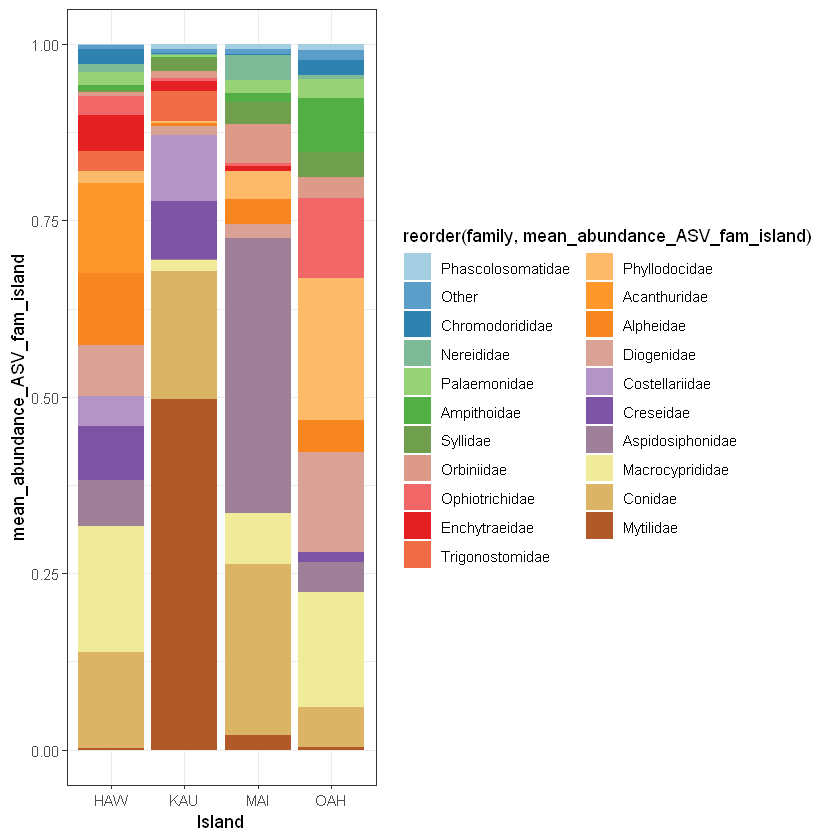

In [72]:
#choose color palette and extend the #of colours
color_barplot <- brewer.pal(12, "Paired") 

# Add more colors to this palette :
color_barplot <- colorRampPalette(color_barplot)(21)

#plot
taxonomic_barplot_phyla <-ggplot(family_barplot, aes(fill= reorder(family,mean_abundance_ASV_fam_island) , y= mean_abundance_ASV_fam_island,
                                                     x= Island))+
  geom_bar (position="fill",  stat= "identity")+theme_bw()+
  scale_fill_manual(values=color_barplot)
  #geom_text(data=Mean_ASV_per_sample_for_ea_ISland, aes(x=Island, label=mean_abundance_ASV_island, y=mean_abundance_ASV_island, fill=NULL), nudge_y=10)

#save the barlot
ggsave(taxonomic_barplot_phyla,height = 5, width = 8, filename="Taxonomic_Barplot.jpeg")

#view barplot
taxonomic_barplot_phyla

## Beta diversity analysis (PERMANVOA + NMDS)

### Code

In [12]:
#compute PERMANVOA
permanova<-adonis(t_ASV_table_DNA_phylum_1 ~ Island, data=ASV_Meta_data_Phylum, permutations = 9999, method = "jaccard", na.rm=T)

permanova

distances <- vegdist(t_ASV_table_DNA_phylum_1,method="jaccard", na.rm=T)
coordinates <- metaMDS(distances)

scores.table <- as.data.frame(scores(coordinates))
scores.table <- merge(scores.table,Meta_data_phylum, by="row.names",all.x=T)


Call:
adonis(formula = t_ASV_table_DNA_phylum_1 ~ Island, data = ASV_Meta_data_Phylum,      permutations = 9999, method = "jaccard", na.rm = T) 

Permutation: free
Number of permutations: 9999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Island      3     4.553 1.51768  3.4555 0.08013  1e-04 ***
Residuals 119    52.266 0.43921         0.91987           
Total     122    56.819                 1.00000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Run 0 stress 0.2569131 
Run 1 stress 0.2627048 
Run 2 stress 0.2808599 
Run 3 stress 0.2681346 
Run 4 stress 0.2563746 
... New best solution
... Procrustes: rmse 0.02925964  max resid 0.1981131 
Run 5 stress 0.2608386 
Run 6 stress 0.2640332 
Run 7 stress 0.2736781 
Run 8 stress 0.2846843 
Run 9 stress 0.2696233 
Run 10 stress 0.2620619 
Run 11 stress 0.2647697 
Run 12 stress 0.267173 
Run 13 stress 0.2776093 
Run 14 stress 0.2785557 
Run 15 stress 0.2632909 
Run 16 stress 0.2739759 
Run 17 stress 0.2666895 
Run 18 stress 0.2760925 
Run 19 stress 0.2705584 
Run 20 stress 0.2565398 
... Procrustes: rmse 0.02643402  max resid 0.1948894 
*** No convergence -- monoMDS stopping criteria:
     1: no. of iterations >= maxit
    19: stress ratio > sratmax


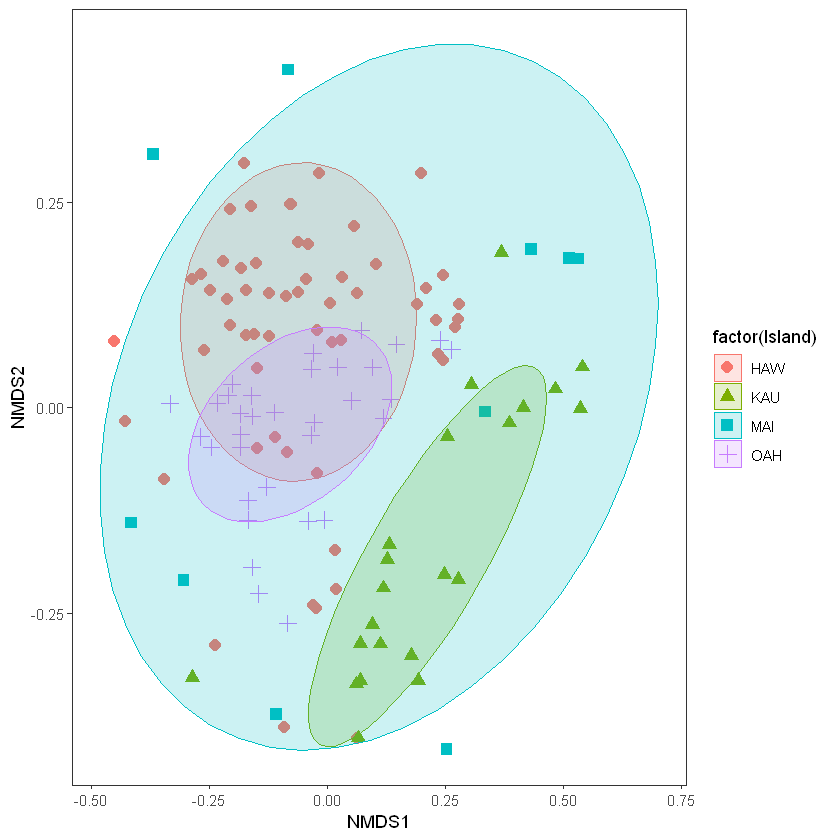

In [13]:
#Plot NMDS
NMDS<-ggplot(scores.table)+ 
  geom_point(data=scores.table, aes(x=NMDS1,y=NMDS2,shape=factor(Island),colour=factor(Island),fill=factor(Island)),size=3)+
  stat_ellipse(geom = "polygon",aes(x=NMDS1,y=NMDS2,color=factor(Island),fill =factor(Island)),alpha=0.2,level=0.7)+
  theme_bw()+theme(panel.grid.major=element_line(colour="white"),panel.grid.minor=element_line(colour="white"),strip.background = element_rect(fill="white"))

NMDS

ggsave(NMDS,height = 4.5, width = 6.5, filename="NMDS.jpeg")

## Indicator Species Heatmaps

### code

In [14]:
#select the ASVs that are associated with a particular factor at treshold of a=0.1
ASV_heatmap <- t_ASV_table_DNA_phylum %>%
  na.omit()

Combined_heatmap <- ASV_Meta_data_Phylum %>%
  na.omit()

cluster_heatmap <- factor(Combined_heatmap$Island)

species_specific <- multipatt(ASV_heatmap, cluster_heatmap)

summary(species_specific,alpha=0.01)

species_sign <- as.data.frame(species_specific$sign)

#select only association with an island at treshold < 0.01
species_sign_sign <- species_sign%>%
  filter(p.value <0.01)

head(species_sign_sign)


 Multilevel pattern analysis
 ---------------------------

 Association function: IndVal.g
 Significance level (alpha): 0.01

 Total number of species: 2903
 Selected number of species: 362 
 Number of species associated to 1 group: 332 
 Number of species associated to 2 groups: 24 
 Number of species associated to 3 groups: 6 

 List of species associated to each combination: 

 Group HAW  #sps.  44 
         stat p.value   
ASV3787 0.851   0.005 **
ASV5774 0.808   0.005 **
ASV3587 0.799   0.005 **
ASV8036 0.742   0.005 **
ASV7224 0.695   0.005 **
ASV9275 0.692   0.005 **
ASV4473 0.682   0.005 **
ASV5130 0.682   0.005 **
ASV4614 0.670   0.005 **
ASV4870 0.670   0.005 **
ASV99   0.668   0.005 **
ASV4593 0.665   0.005 **
ASV1051 0.656   0.005 **
ASV724  0.630   0.005 **
ASV2367 0.630   0.005 **
ASV8542 0.630   0.005 **
ASV4170 0.629   0.005 **
ASV1816 0.602   0.005 **
ASV8011 0.602   0.005 **
ASV4472 0.600   0.005 **
ASV3888 0.587   0.005 **
ASV8357 0.587   0.010 **
ASV9099 0.587   0.

,s.HAW,s.KAU,s.MAI,s.OAH,index,stat,p.value
ASV7,0,1,0,0,2,0.6396021,0.005
ASV37,0,0,1,0,3,0.4927537,0.005
ASV38,0,0,1,0,3,0.5477226,0.005
ASV42,1,1,0,0,5,0.6997310,0.005
ASV99,1,0,0,0,1,0.6684272,0.005
ASV111,0,1,0,0,2,0.5640761,0.005


In [15]:
#Add the name of the column instead of 0 or 1
species_sign_sign$sample <- row.names(species_sign_sign)
species_sign_no_binary <- species_sign_sign%>%
  pivot_longer(cols = starts_with("s."),
               names_to = "Island") %>%
  filter(value == 1)

#delete uneccessary columns
species_sign_no_binary$stat<-NULL
species_sign_no_binary$value<-NULL
species_sign_no_binary$p.value<-NULL

#correct Islands name
species_sign_no_binary$Island <- gsub ("s.", "", as.character(species_sign_no_binary$Island))

In [16]:
#subset ONLY ASV that are specific to each island
specific_ASV<- row.names(species_sign_sign)

#scale the ASV heatmap table
scaled_ASV_heatmap<-data.frame(scale(ASV_heatmap, center = TRUE, scale = TRUE))

#long format of all phyla asv
scaled_ASV_heatmap$Sample <- row.names(scaled_ASV_heatmap)
long_scale_ASV<-melt(scaled_ASV_heatmap,by="rownames")

#long format of only specific taxa
long_species_sign <-subset(long_scale_ASV,variable%in%specific_ASV)

#Make each ASV as factor
ASV_factors<-factor(specific_ASV)

#merge with meta_data file
long_species_sign<- merge(long_species_sign, Meta_data_phylum, by="Sample")
long_species_sign<- merge(long_species_sign, species_sign_no_binary, by.x="variable", by.y="sample")

long_species_sign <- long_species_sign%>%
  arrange(Island.x)

head(long_species_sign)

long_species_sign$variable<- factor (long_species_sign$variable, levels= long_species_sign$Sample[order(long_species_sign$Island.y)])

Using Sample as id variables


variable,Sample,value,NewSite,Site,Unit,UnitFrac,Fraction,Depth,Year,SiteIsleCode,Island.x,SubRegion,Region,LargeRegion,lat,lon,Lab,index,Island.y
ASV1009,HAW22A_100_S36,-0.1878033,HAW22,HAW22,HAW22A,HAW22A_100,100,50,2013,HAW,HAW,MHI,MHI,Hawaii,18.9686,-155.73073,Molly,2,KAU
ASV1009,HAW48A_BS_S32,-0.1878033,HAW48,HAW48,HAW48A,HAW48A_BS,BS,43,2016,HAW,HAW,MHI,MHI,Hawaii,19.06071,-155.55237,Molly,2,KAU
ASV1009,HAW22B_100_M7,-0.1878033,HAW22,HAW22,HAW22B,HAW22B_100,100,50,2013,HAW,HAW,MHI,MHI,Hawaii,18.9686,-155.73073,Emma,2,KAU
ASV1009,HAW22B_100_M2,-0.1878033,HAW22,HAW22,HAW22B,HAW22B_100,100,50,2013,HAW,HAW,MHI,MHI,Hawaii,18.9686,-155.73073,Emma,2,KAU
ASV1009,HAW48B_500_S35,-0.1878033,HAW48,HAW48,HAW48B,HAW48B_500,500,43,2016,HAW,HAW,MHI,MHI,Hawaii,19.06071,-155.55237,Molly,2,KAU
ASV1009,HAW24C_BS_M1,-0.1878033,HAW24,HAW24,HAW24C,HAW24C_BS,BS,48,2013,HAW,HAW,MHI,MHI,Hawaii,19.03822,-155.88255,Emma,2,KAU


ERROR: Error in `levels<-`(`*tmp*`, value = as.character(levels)): factor level [59] is duplicated


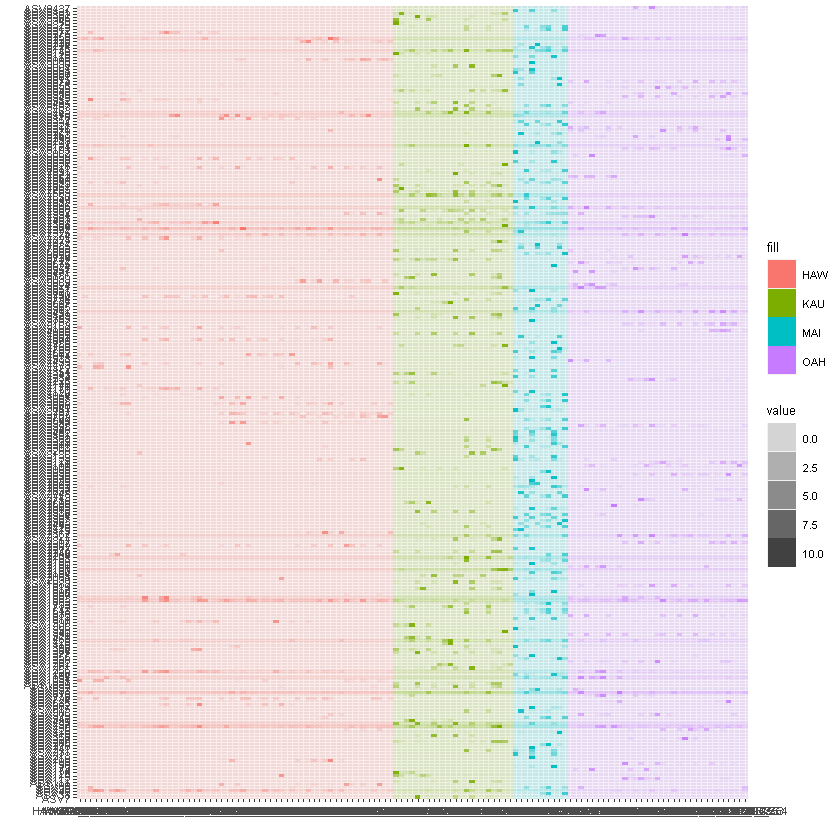

In [164]:

Heatmap<-ggplot(long_species_sign, aes(x = Sample, y = variable))+ aes(fill="metal")+
  geom_tile(aes(alpha= value, fill=Island.x))+ 
  labs(x="",y="")+
  scale_y_discrete(expand=c(0,0)) +
scale_x_discrete(expand=c(0,0))+
theme_grey(base_size=8)
  
Heatmap

## Obtaining data taxonomic summary of community composition -En cours

In [533]:
#Total Number of ASV

#Total Number of ASV classified to phyla level

In [534]:
#List the number of unique taxa (phyla, class, orders, families, genus and species identified)

taxa_number <- function (combined.table, taxa) { 
    unique_taxa <- combined.table %>%
    distinct({{taxa}}) %>%
    dplyr:: summarise (n_taxa= n())
    return(unique_taxa)
    }

taxa_number (combined_Table_Phylum, phylum)

n_taxa
18


In [535]:
taxa_number <- function (combined.table, taxa) { 
    for (i ncol((taxa)){ 
    unique_taxa <- combined.table %>%
    distinct({{taxa}}) %>%
    dplyr:: summarise (n_taxa= n())
    return(unique_taxa)
    }
    }

ERROR: Error in parse(text = x, srcfile = src): <text>:2:12: unexpected symbol
1: taxa_number <- function (combined.table, taxa) { 
2:     for (i ncol
              ^


In [ ]:
#Summary of main taxa, their ASV abundance and the % of total ASVs


#Add a column with the sum of each ASVs and the percentage of each ASV
combined_Table_Phylum_Sum <- combined_Table_Phylum%>%
  filter(!(is.integer=TRUE))



In [ ]:
      combined_Table_Phylum[!(sapply(combined_Table_Phylum, is.character))], rowSums)

      rowSums,  
                ASV.percent.total.reads= combined_Table_Phylum%>% 
   select_if(is.character)%>%
  rowSums/sum(ASV.sum)*100)


In [ ]:
ASV_Meta_data_Phylum [!(sapply(ASV_Meta_data_Phylum, is.character))]
  
                
                select(starts_with (c("HA", "KA", "MA","OA")))%>%
  rowSums, 
  ASV.percent.total.reads= combined_Table_Phylum%>% 
  select(starts_with (c("HA", "KA", "MA","OA")))%>%
  rowSums/sum(ASV.sum)*100)